In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [2]:
assert hasattr(tf, "function")

In [10]:
#from tensorflow import keras

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images,targets),(_,_) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

print(images.shape)
print(targets.shape)

(10000, 28, 28)
(10000,)


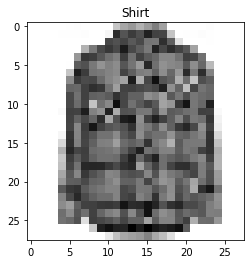

In [13]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#plot one image  []
#plt.imshow(np.reshape())
plt.imshow(images[32 ,cmap="binary")
plt.title(targets_names[targets[32]])
plt.show()

In [14]:
#[]

print("First line of one image", image[32][0])
print("Associated target", targets[11])

First line of one image [  0   0   0   0   0   1   2   0   0   0   0  58  88 102  78 100 128  94
   0   0   0   0   0   2   0   0   0   0]
Associated target 9


In [6]:
#import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)


(10000, 784)
(10000,)


In [10]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.00894834 0.11810537 0.11112303 0.06934464 0.09960455 0.03110922
  0.28570852 0.06718395 0.15061752 0.05825493]] [9]


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [16]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 0.9571 - val_loss: 0.2166 - val_accuracy: 0.9245
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9599 - val_loss: 0.2154 - val_accuracy: 0.9210
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9630 - val_loss: 0.2168 - val_accuracy: 0.9185
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9670 - val_loss: 0.2228 - val_accuracy: 0.9130
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9697 - val_loss: 0.2280 - val_accuracy: 0.9160
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9715 - val_loss: 0.2229 - val_accuracy: 0.9160
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9741 - val_loss: 0.2286 - val_accuracy: 0.9160
Epoch 

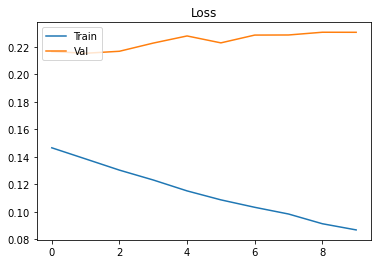

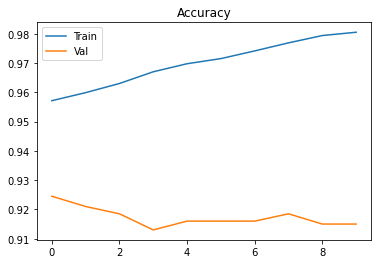

In [17]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [18]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 0s 619us/step - loss: 0.4822 - accuracy: 0.8541
Test Loss 0.48219770193099976
Test Accuracy 0.8540999889373779
